# Individual Planning Report

This proposal describes the features of the data in the project that we are going to working on, demostrates my intepretation of all variable and potential problems in the data, and shows both the broad question I would like to address and formulate one specific question and its answer.

In [ ]:
#some packages and scripts needed to be loaded before the programme
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

In [ ]:
## 1. Data Description
**Summary of the observations and variations:**

![summary of observations.png](attachment:f567d712-4b67-4859-84c7-ea2356ca987b.png)



**Meaning And Type of Variables in "players.csv"**
- `experience -> Players' skill of the game (string or text)`
- `subscribe -> Whether the player subscribes the game-related newsletter (logical vector (boolean))`
- `hashedEmail -> Players' email that have been hashed (string or text)`
- `played_hours -> Time that players have been played (double)`
- `name -> Players' name (string or text)`
- `gender -> Players' gender (string or text)`
- `Age -> Players' age (double)`


**Meaning And Type of Variables in "sessions.csv"**
- `hashedEmail -> Players' email that have been hashed (string or text)`
- `start_time -> The time that players start playing (string or text)`
- `end_time -> The time that stop playing (string or text)`
- `original_start_time -> The timestamp that players start playing (string or text)`
- `original_end_time -> The timestamp that stop playing (string or text)`

## 2. Questions
In this project, I will discover what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types. In specific, I'm going to find out how can we predict the subscribing of a new player by two predictors the hours that players have been played(played_hours) and the age of the players(Age) among players with different experience. 

For this question, I would first filter the observations with different experiences, then select three variables in the player dataset, played_hours, Age and subscribe. As I am going to make prediction on a catagorical variable, I tend to use the model of classfication with K-nearest neighbor. 

## 3. Exploratory Data Analysis and Visualization

**The mean of numerical variables in player.csv:**

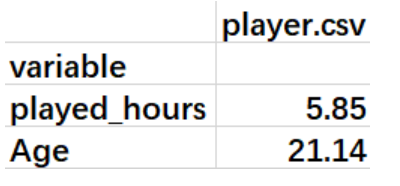

In [ ]:
#loading data and assign them to objects 
playr <- read_csv("project-data/players.csv")
avg_hours <- round(colMeans(playr["played_hours"], na.rm = TRUE), digits = 2)
avg_age <- round(colMeans(playr["Age"], na.rm = TRUE), digits = 2)

sessions <- read_csv("project-data/sessions.csv")


playr
sessions
avg_hours
avg_age

#

In [ ]:
## We need to extract the variables that are related to our question, which are "experience", "played_hours" , "Age" and "subscribe".

useful_playr <- playr |>
                select(experience, played_hours, subscribe, Age)
useful_playr

As we want to discover the prediciton in different players' experience, we need to filter the dataframe in to 5 datasets with 5 particular experiences: 
`"Pro"`, `"Veteran"`, `"Regular"`, `"Amateur"`, `"Beginner"`

In [ ]:
pro_playr <- useful_playr |>
            filter(experience == "Pro")
vet_playr <- useful_playr |>
            filter(experience == "Veteran")
reg_playr <- useful_playr |>
            filter(experience == "Regular")
amt_playr <- useful_playr |>
            filter(experience == "Amateur")
beg_playr <- useful_playr |>
            filter(experience == "Beginner")
pro_playr
vet_playr
reg_playr
amt_playr
beg_playr

Now we can make several scatter plots to visualize each dataset. 

In [ ]:
pro_playr_plot <- pro_playr |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years old)", colour = "Subscribing", title = "Pro Players Subscribing")+
                theme(text = element_text(size = 20))

vet_playr_plot <- vet_playr |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years old)", colour = "Subscribing", title = "Veteran Players Subscribing")+
                theme(text = element_text(size = 20))

reg_playr_plot <- reg_playr |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years old)", colour = "Subscribing", title = "Regular Players Subscribing")+
                theme(text = element_text(size = 20))

amt_playr_plot <- amt_playr |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years old)", colour = "Subscribing", title = "Amateur Players Subscribing")+
                theme(text = element_text(size = 20))

beg_playr_plot <- beg_playr |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years old)", colour = "Subscribing", title = "Beginner Players Subscribing")+
                theme(text = element_text(size = 20))

pro_playr_plot
vet_playr_plot
reg_playr_plot
amt_playr_plot
beg_playr_plot

Throughout the plots above, several players have played significantly longer than others. As a result, many data points are clustered too closely together, which may affect our predictions. To address this, we notice that all players who have played for more than 12 hours are subscribed to the game-related newsletter. Therefore, we can filter out players with less than 12 hours of playtime and recreate the plots.

In [ ]:
new_pro_playr_plot <- pro_playr |>
                filter(played_hours < 12) |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years)", colour = "Subscribing", title = "Pro Players Subscribing")+
                theme(text = element_text(size = 20))

new_vet_playr_plot <- vet_playr |>
                filter(played_hours < 12) |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years)", colour = "Subscribing", title = "Veteran Players Subscribing")+
                theme(text = element_text(size = 20))

new_reg_playr_plot <- reg_playr |>
                filter(played_hours < 12) |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years)", colour = "Subscribing", title = "Regular Players Subscribing")+
                theme(text = element_text(size = 20))

new_amt_playr_plot <- amt_playr |>
                filter(played_hours < 12) |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years)", colour = "Subscribing", title = "Amateur Players Subscribing")+
                theme(text = element_text(size = 20))

new_beg_playr_plot <- beg_playr |>
                filter(played_hours < 12) |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe))+
                geom_point()+
                labs(x = "Time That Have Been Played (hours)", y = "Players' Ages (years)", colour = "Subscribing", title = "Beginner Players Subscribing")+
                theme(text = element_text(size = 20))

new_pro_playr_plot
new_vet_playr_plot
new_reg_playr_plot
new_amt_playr_plot
new_beg_playr_plot

Now we can clearly see the subscription among players who have different game experience. Through these charts, we can roughly say that the players who have game experience below "Regular"(which are "Amateur" and "Beginner") and older than 30 years tend not to subscribe, and the number of players who subscribe to the game's newsletter is more than the players who do not subscribe. 